# Neural Networks

- [Architecture](#architecture)
    - [Activation Funcions](#activation-functions)
    - [Backpropagation](#backpropagation)
- [Multiclass Classification](#multiclass-classification)
    - [One Hot Encoding](#one-hot-encoding)
    - [Problem Definition](#problem-definition)
    - [Softmax Layer](#softmax-layer)
- [Machine Learning](#machine-learning)
    - [Linear Model](#linear-model)
    - [Feedforward Neural Network](#feedforward-neural-network)
- [Challenges](#challenges)
    - [MNIST](#mnist)
    - [Boston](#boston)

## Architecture  <a class="anchor" id="architecture"></a>

<img width="500px" src='../assets/NeuralNetwork.png'>

\begin{equation}
    f(\mathbf{X}) = \boldsymbol{\sigma(\mathbf{X}*\mathbf{w_{1}} + \mathbf{b_{1}})*\mathbf{w_{2}} + \mathbf{b_{2}}}
\end{equation}

* Hidden **Affine Layer**: with parameters $\mathbf{w_{1}}, \mathbf{b_{1}}$
and activation function $\boldsymbol{\sigma}$ contributes to the feature extraction.
    - automation of **Feature Engineering**
* Ouput **Linear Layer**: parameters $\mathbf{w_{2}}, \mathbf{b_{2}}$
performs Linear Regression on the "complex" features, extracted from the network 
    - flexibility of **Non-Linear Models**

### Activation Functions <a class="anchor" id="activation-functions"></a>

$\sigma$ is the activation function of the hidden layer.

#### Identity Function

The Neural Network maps $\mathbf{X}$ to $\mathbf{y}$ according to:
\begin{align}
    f(\mathbf{X}) &= \mathbf{\hat{y}}\\
    f(\mathbf{X}) &= \boldsymbol{\sigma(\mathbf{X}*\mathbf{w_{1}} + \mathbf{b_{1}})*\mathbf{w_{2}} + \mathbf{b_{2}}}  
\end{align}

For $\boldsymbol{\sigma(X)} = \mathbf{X}$:
\begin{align}
    f(\mathbf{X}) &= (\mathbf{X}*\mathbf{w_{1}} + \mathbf{b_{1})*\mathbf{w_{2}} + \mathbf{b_{2}}}\\
    f(\mathbf{X}) &= \mathbf{X}*\mathbf{w_{1}}*\mathbf{w_{2}} + \mathbf{b_{1}}*\mathbf{w_{2}}\\
    f(\mathbf{X}) &= \mathbf{X}*\mathbf{\tilde{w}} + \mathbf{\tilde{b}}
\end{align}

> Consequently, the model has the same capacity with a simple **Linear Model**.

This applies to all the hidden layers, but not the output,
which can have an identity activation function for regression problems.

### Backpropagation <a class="anchor" id="backpropagation"></a>

According to the **Stochastic Gradient Descent (SGD)** optimisation algorithm, the update rules for the parameters:

$$\mathbf{w^{(t+1)}} = \mathbf{w^{(t)}} + \eta \frac{\partial \mathcal{J}}{\partial \mathbf{w}}$$
and
$$\mathbf{b^{(t+1)}} = \mathbf{b^{(t)}} + \eta \frac{\partial \mathcal{J}}{\partial \mathbf{b}}$$
where:
* $\mathcal{J}$: the loss function

## Multiclass Classification  <a class="anchor" id="multiclass-classification"></a>

### Problem Definition <a class="anchor" id="problem-definition"></a>

**Classification**: task of choosing a class, category for a given input.

**Binary Classification**: the input belongs to any of **two** classes.

**Multi-class Classification**: there is a finite number of classes, greater than two, for the input.

### One Hot Encoding  <a class="anchor" id="one-hot-encoding"></a>

For an $M$-class Classification, convert the scalar output to an $M$-dimensional vector
with a single **1** at the $i_{th}$ component if the datapoint belongs to the $i_{th}$ class
and all other components to **0**.

For example, for a **3-class Classification** `{1: red, 2: blue, 3: yellow}` problem:
* `1 = [1 0 0]` $\rightarrow$ `red` class

* `2 = [0 1 0]` $\rightarrow$ `blue` class

* `3 = [0 0 1]` $\rightarrow$ `yellow` class

```python
def int_to_onehot(x, num_classes):
    """Convert an `int` to one hot (binary) format."""
    tmp = np.zeros(num_classes, dtype=int)
    tmp[-x - 1] = 1
    return tmp
```

### Softmax Layer <a class="anchor" id="softmax-layer"></a>

For an **$M$-class Classification** using **One Hot Encoding** the output layer is $M$-dimensional.
In order to quantify predictability of the network and provide confidence intervals of selected class,
output layer values are turned to probabilities using **Softmax Function**:

$$p_{j}(x) = \frac{e^{x_{j}}}{\sum_{m=1}^{M}e^{x_{m}}}, \quad j=1, 2, ..., M$$

```python
def softmax(z):
    """Softmax Layer - Forward Pass"""
    return np.exp(z) / np.sum(np.exp(z))
```

## Machine Learning  <a class="anchor" id="machine-learning"></a>

In [1]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [16.0, 12.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

### Data

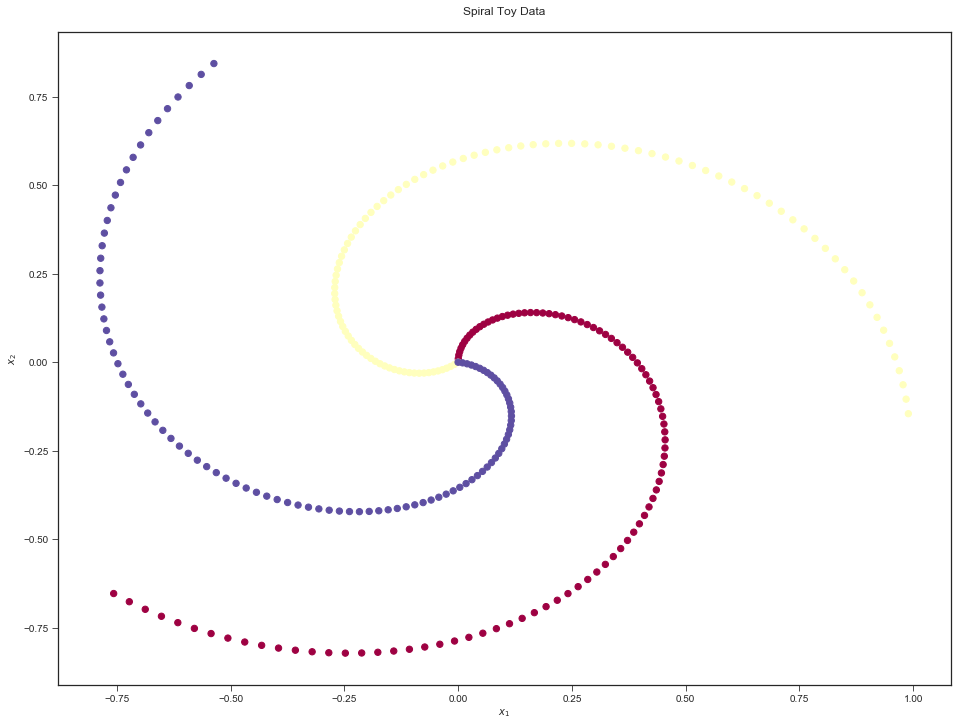

In [2]:
# helper module for toy data generation
from adapter import make_spiral, array_to_onehot
# helper module for data visualization
import visualize

# number of samples per class
N = 100
# dimensionality of input space
D = 2
# number of classes to classify
K = 3

# generate toy data
X, _y = make_spiral(N, D, K, one_hot=False)
# convert class label to one_hot vector
y = array_to_onehot(_y, K)

# plot data to 2D plane
plt.scatter(X[:, 0], X[:, 1], c=_y, s=40, cmap=plt.cm.Spectral)
plt.title('Spiral Toy Data\n')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$');

### Linear Model  <a class="anchor" id="linear-model"></a>

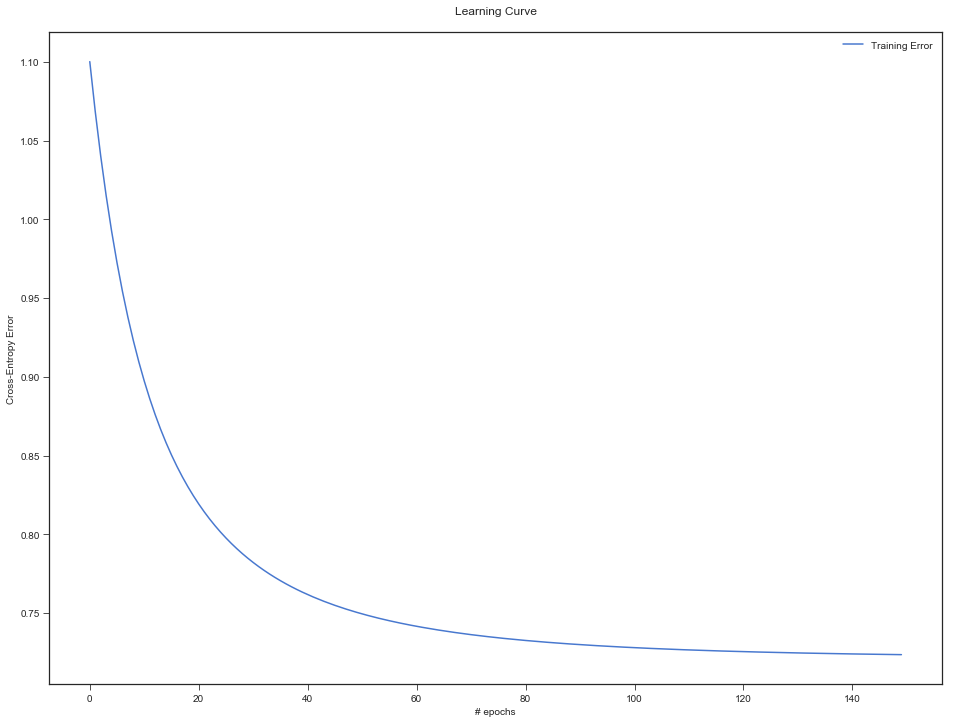

In [3]:
# Train a Linear Classifier

# Model Parameters
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Hyperparameters
eta = 1e-0 # learning rate
n_epochs = 150 # number of epochs

# Number of datapoints
N = X.shape[0]

# Softmax layer
softmax = lambda s: s / np.sum(s, axis=1, keepdims=True)

# Store history of loss
hist = []

for i in range(n_epochs):
  
    # Feedforward pass: class scores, [N x K]
    scores = np.dot(X, W) + b

    # Convert scores to probabilities
    exp_scores = np.exp(scores)
    # Softmax Layer
    probs = softmax(exp_scores)

    # Cross-Entropy Error
    corect_logprobs = -np.log(probs[range(N),_y])
    loss = np.sum(corect_logprobs) / N
    
    # Log
    hist.append(loss)

    # Backward pass: compute gradients
    dscores = probs
    dscores[range(N), _y] = dscores[range(N), _y] - 1
    dscores = dscores / N

    # Compute gradients
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    # Update rule: Stochastic Gradient Descent
    W = W - (eta * dW)
    b = b - (eta * db)

# Plot training error
plt.figure()
plt.plot(hist)
plt.title('Learning Curve\n')
plt.xlabel('# epochs')
plt.ylabel('Cross-Entropy Error')
plt.legend(['Training Error']);

In [4]:
# Model Evaluation
scores = np.dot(X, W) + b
prediction = np.argmax(scores, axis=1)

'training accuracy: %.3f' % (np.mean(prediction == _y))

'training accuracy: 0.523'

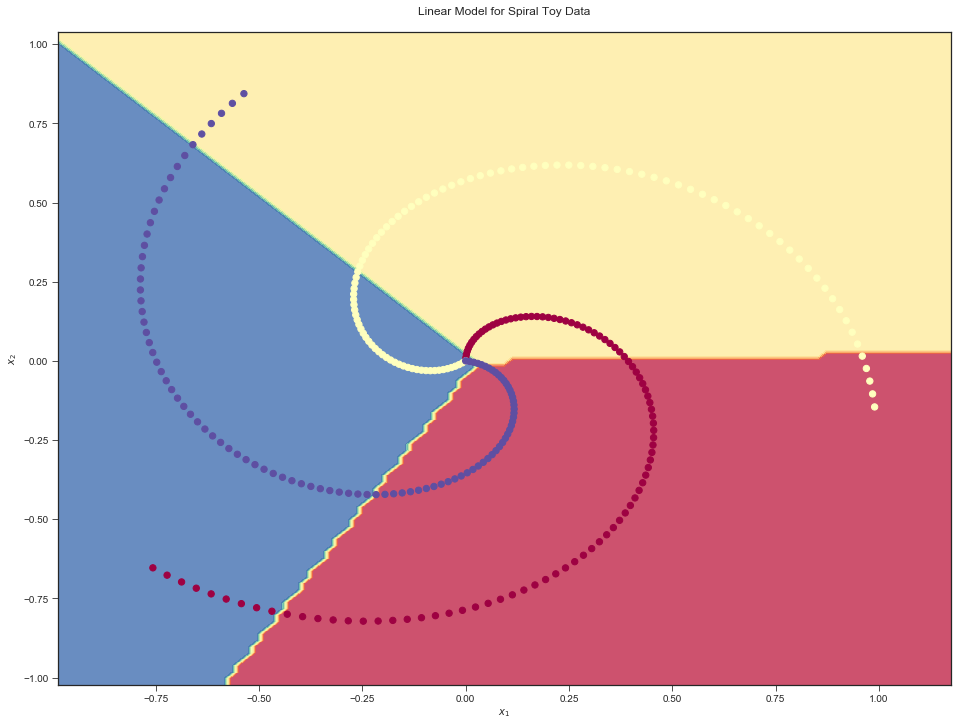

In [5]:
# visualize separation lines
visualize.linear(X, _y, W, b)

### Feedforward Neural Network  <a class="anchor" id="feedforward-neural-network"></a>

| Step | Question                             | Answer                         |
| ---- |--------------------------------------| ------------------------------ |
| 1    | Labeled Data?                        | $\textbf{X}$ and $\textbf{y}$  |
| 2    | Number of features of $\mathbf{X}$   | 2                              |
| 3    | Number of components of $\mathbf{y}$ | 3 (one-hot-encoding)           |
| 4    | Size of hidden layer                 | ???                            |
| 5    | Problem Nature                       | **Multi-class Classification** |
| 6    | Loss Function                        | **Cross Entropy Error**        |
| 7    | Update Rules                         | **Backpropagation Algorithm**  |

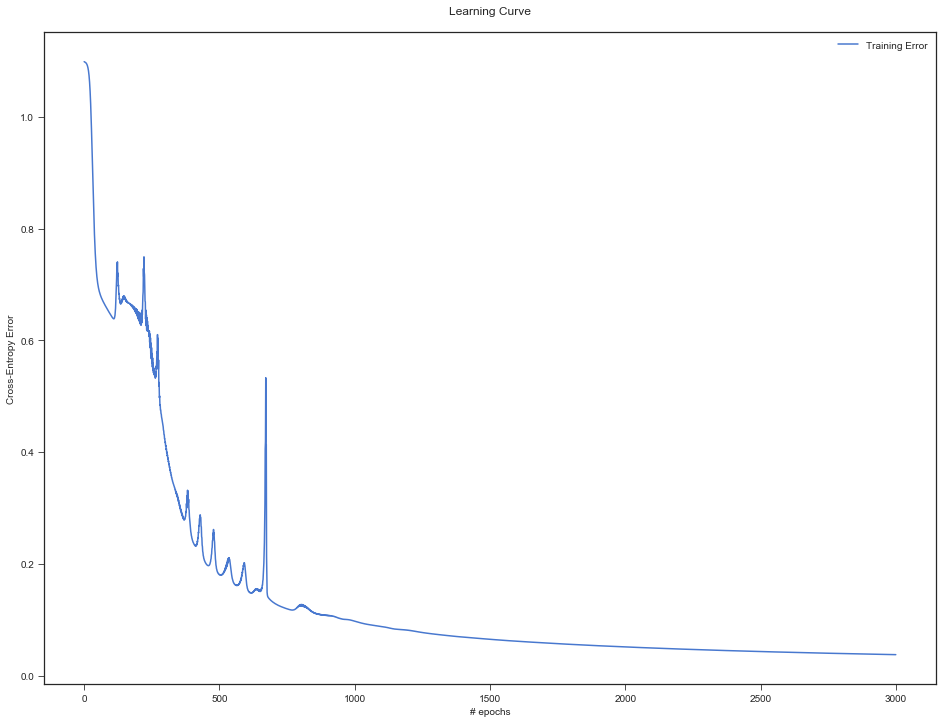

In [6]:
# Train a Single Hidden Layer Feedforward Neural Network

# Hyperparameters
h = 100 # size of hidden layer
eta = 1e-0 # learning rate
n_epochs = 3000 # number of epochs

# Model Parameters
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# Number of datapoints
N = X.shape[0]

# ReLU activation function
relu = lambda z: np.maximum(0, z)

# Softmax layer
softmax = lambda s: s / np.sum(s, axis=1, keepdims=True)

# Store history of loss
hist = []

for i in range(n_epochs):
  
    # Feedforward pass: class scores, [N x K]
    hidden_layer = relu(np.dot(X, W1) + b1) # hidden layer
    scores = np.dot(hidden_layer, W2) + b2  # net output

    # Convert scores to probabilities
    exp_scores = np.exp(scores)
    # Softmax Layer
    probs = softmax(exp_scores)

    # Cross-Entropy Error
    corect_logprobs = -np.log(probs[range(N),_y])
    loss = np.sum(corect_logprobs) / N
    
    # Log
    hist.append(loss)
  
    # Backward pass: compute gradients
    dscores = probs
    dscores[range(N), _y] -= 1
    dscores = dscores / N

    # Compute gradients
    # Backprop: W2, b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # Backprop: hidden layer
    dhidden = np.dot(dscores, W2.T)
    # Backprop: ReLU
    dhidden[hidden_layer <= 0] = 0
    # Backprop: W1, b1
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Update rule: Stochastic Gradient Descent
    W1 = W1 - (eta * dW1)
    b1 = b1 - (eta * db1)
    W2 = W2 - (eta * dW2)
    b2 = b2 - (eta * db2)

# Plot training error
plt.figure()
plt.plot(hist)
plt.title('Learning Curve\n')
plt.xlabel('# epochs')
plt.ylabel('Cross-Entropy Error')
plt.legend(['Training Error']);

In [7]:
# Model Evaluation
hidden_layer = relu(np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
'training accuracy: %.3f' % (np.mean(predicted_class == _y))

'training accuracy: 0.993'

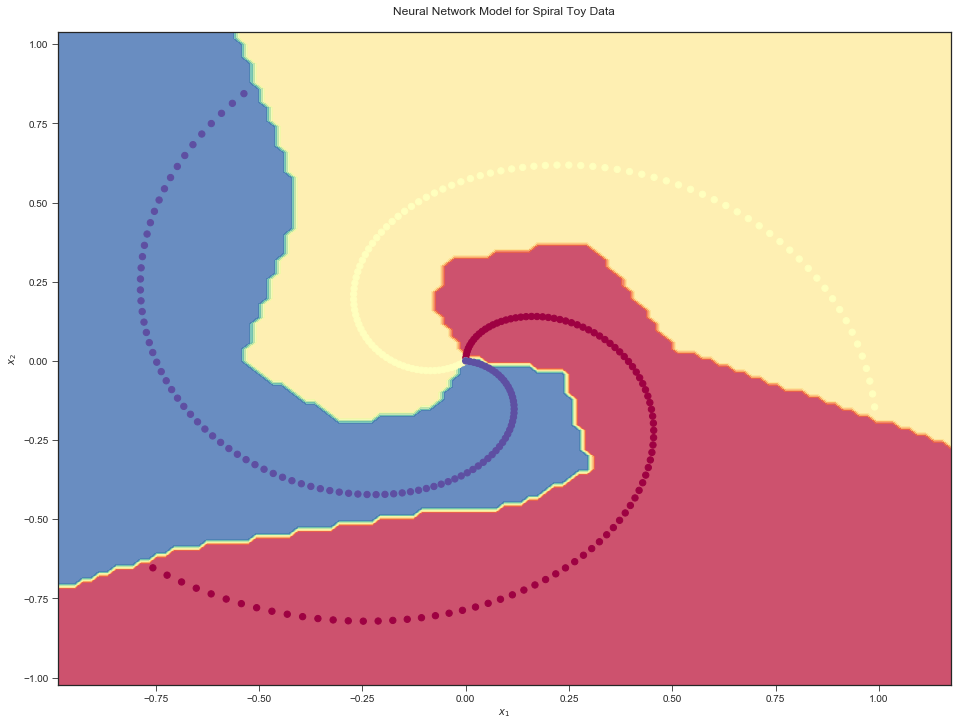

In [8]:
# visualize separation curves
visualize.nn(X, _y, W1, b1, W2, b2)

### [Tensorflow Playground](http://playground.tensorflow.org/)

Binary classification game, built with TensorFlow.

## Challenges  <a class="anchor" id="challenges"></a>

### Boston  <a class="anchor" id="boston"></a>

Regression for `Boston` dataset using:
* a Linear Model
* a Single Layer Feedforward Neural Network

In [9]:
from sklearn.datasets import load_boston

# Load Data
X, y = load_boston(return_X_y=True)

# Dimensions
N, D = X.shape

# make sure input-output sizes are consistent
assert(X.shape[0] == y.shape[0])

### MNIST  <a class="anchor" id="mnist"></a>

**Multi-class classification** of handwritten digits for `MNIST` dataset using:
* a Linear Model
* a Single Layer Feedforward Neural Network

In [10]:
from sklearn.datasets import fetch_mldata

# Load Data
mnist = fetch_mldata('MNIST original', data_home='.')
X, y = mnist['data'], mnist['target'].astype(int)

# Dimensions
N, D = X.shape

# make sure input-output sizes are consistent
assert(X.shape[0] == y.shape[0])

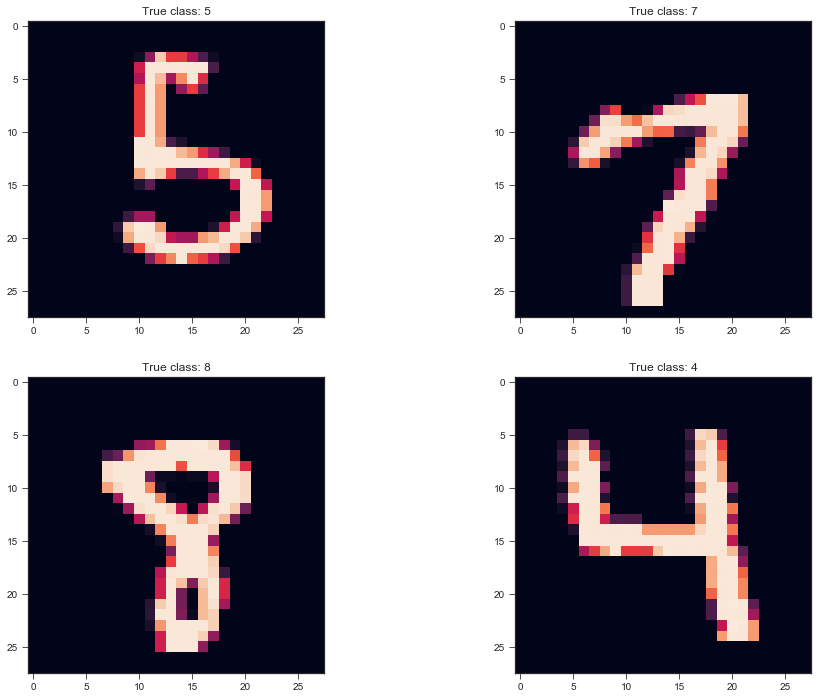

In [11]:
# pick 4 random images from dataset
_indeces = np.random.randint(0, N, 4)

fig = plt.figure()

for i in range(4):
    ax = fig.add_subplot(221+i)
    # visualize, 28x28 pixels
    ax.imshow(X[_indeces[i]].reshape(28, 28))
    # print true class
    ax.set_title('True class: %s' % y[_indeces[i]])